# Performance Metrics

In [1]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

### Risk and Performance

In [9]:
# Annualized volatility of the option returns for Google
annualized_volatility = round(signals_df["Actual Returns"].std() * np.sqrt(252) * 100, 2)

# Display results
print("Annualized Volatility:", annualized_volatility, "%")

Annualized Volatility: 240.63 %


In [10]:
# Calculate the strategy returns and add them to the signals_df DataFrame
signals_df["Strategy Returns"] = signals_df["Actual Returns"] * signals_df["Signal"].shift()

<AxesSubplot:xlabel='date'>

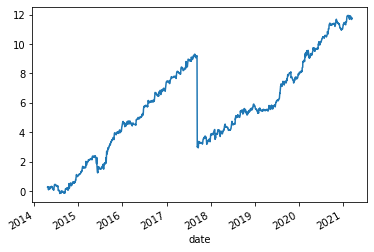

In [12]:
# Calculate the strategy's returns
strategy_returns = signals_df["Strategy Returns"].cumsum()

# Plot Strategy Returns to examine performance
strategy_returns.plot()

## Add Transaction Costs to a Backtest

In [13]:
# Every time we change from long to short, or vice-versa, 2 trades occur
signals_df["Trades"] = np.abs(signals_df["Signal"].diff())

# Display sample data
signals_df.head()

,average,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns,Trades
date,,,,,,,
2014-04-17,0.347731,-0.000046,0.347731,0.376632,-1.0,NaN,NaN
2014-04-21,0.255119,-0.266332,0.255119,0.345334,-1.0,0.266332,0.0
2014-04-22,0.249293,-0.022836,0.249293,0.318503,-1.0,0.022836,0.0
2014-04-23,0.252706,0.013691,0.252706,0.290519,1.0,-0.013691,2.0
2014-04-24,0.254484,0.007036,0.254484,0.271867,1.0,0.007036,0.0


In [14]:
# Calculate total daily trade costs
cost_per_trade = 0.005
daily_trade_costs = signals_df["Trades"] * cost_per_trade

# Display sample data
daily_trade_costs.head()

date
2014-04-17     NaN
2014-04-21    0.00
2014-04-22    0.00
2014-04-23    0.01
2014-04-24    0.00
Name: Trades, dtype: float64

In [15]:
# Calculate strategy returns after costs
signals_df["Strategy Returns (After Costs)"] = signals_df["Strategy Returns"] - daily_trade_costs

### Plot the stragegy returns before and after costs

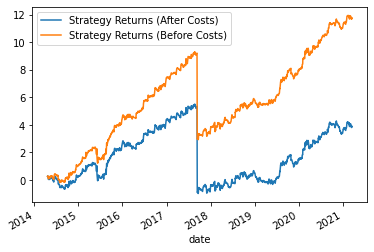

In [16]:
# Compute total strategy returns after costs
strategy_returns_after_costs = signals_df["Strategy Returns (After Costs)"].cumsum()

# Plot stategy returns before and after costs
strategy_returns_after_costs.plot(label="Strategy Returns (After Costs)")
strategy_returns.plot(label="Strategy Returns (Before Costs)")
plt.legend()

## Other Performance Metrics

### Sharpe Ratio

In [17]:
# Calculate Sharpe Ratio
annualized_return = signals_df["Strategy Returns"].mean() * 252 
annualized_std = signals_df["Strategy Returns"].std() * np.sqrt(252)
sharpe_ratio = round(annualized_return/annualized_std, 3)

# Display results
print("Sharpe Ratio:", sharpe_ratio)

Sharpe Ratio: 0.714


### Best-Case/Worst-Case Weekly Performance

In [18]:
# Calculate weekly returns
weekly_returns = signals_df["Strategy Returns"].groupby(
        by=[
            signals_df.index.year,
            signals_df.index.week
        ]
    ).cumsum()

# Display results    
weekly_returns.head()

C:\Users\ijmel\AppData\Local\Temp/ipykernel_24556/2308574085.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  signals_df.index.week


date
2014-04-17         NaN
2014-04-21    0.266332
2014-04-22    0.289168
2014-04-23    0.275477
2014-04-24    0.282513
Name: Strategy Returns, dtype: float64

In [19]:
# Fetch descriptive statistics
weekly_returns.describe()

count    1724.000000
mean        0.025105
std         0.320997
min        -6.201070
25%        -0.033818
50%         0.018571
75%         0.093397
max         0.611968
Name: Strategy Returns, dtype: float64

<AxesSubplot:xlabel='date'>

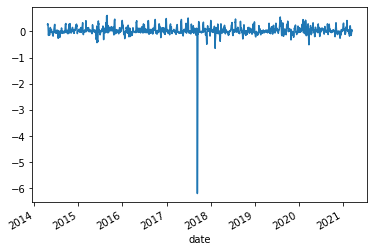

In [20]:
# Plot weekly returns
weekly_returns.plot()